In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
def fetch_mnist():
# Download MNIST dataset
 X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
 X = X.to_numpy()
 y = y.to_numpy()

 # Randomly sample 7000 images
 np.random.seed(2)
 indices = np.random.choice(len(X), 7000, replace=False)
 X, y = X[indices], y[indices]
 return X, y
X, y = fetch_mnist()
print(X.shape, y.shape)

(7000, 784) (7000,)


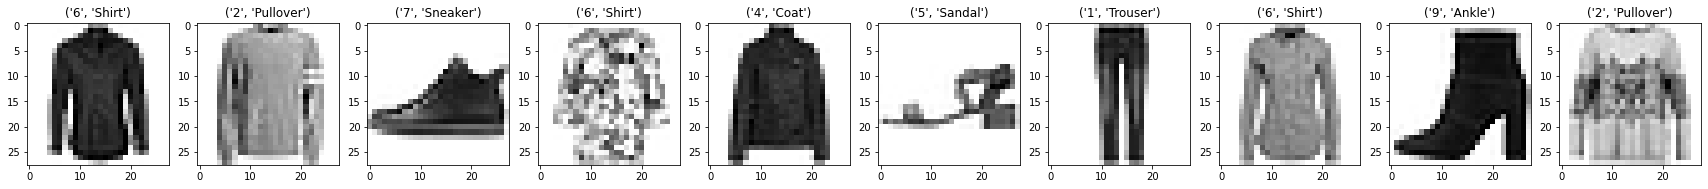

In [ ]:
import matplotlib.pyplot as plt
idx2class={'0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat', '5': 'Sandal', '6': 'Shirt',
           '7': 'Sneaker', '8': 'Bag', '9': 'Ankle'}
figs,subplot=plt.subplots(1,10, figsize=(30,30))
for i in range(10):
   subplot[i].imshow(X[i].reshape(28,28),cmap="binary")
   subplot[i].set_title((y[i],idx2class[y[i]]))
plt.show()

In [ ]:
from sklearn.svm import SVC
def error_calc(y_pred,y):
  error=0
  for i in range(len(y)):
    if y_pred[i]!=y[i]:
      error+=1
  return error/len(y)

def cross_validation_error(X,y,model ,folds):
  average_train_error=0
  average_val_error=0
  X_folds = np.array_split(X, folds)
  y_folds = np.array_split(y, folds)
  for i in range(folds):  
    # choosing the test fold
    X_fold_val=X_folds[i]
    y_fold_val=y_folds[i]
    X_fold_train=[]
    y_fold_train=[]
    for j in range(folds):
      if j!=i:
        for k in range(len(X_folds[j])):
            X_fold_train.append(X_folds[j][k])
            y_fold_train.append(y_folds[j][k])
    model.fit(X_fold_train,y_fold_train)
    y_train_pred=model.predict(X_fold_train)
    average_train_error+=error_calc(y_train_pred,y_fold_train)
    y_val_pred=model.predict(X_fold_val)
    average_val_error+=error_calc(y_val_pred,y_fold_val)

  return average_train_error/folds,average_val_error/folds

def SVM_results(X_train, y_train, X_test, y_test):
  folds=4
  errors={}
  models=[ SVC(kernel="linear"),SVC(kernel="poly",degree=2),SVC(kernel="poly",degree=4),SVC(kernel="poly",degree=6), 
          SVC(kernel="poly",degree=8),SVC(kernel="rbf",gamma=0.001),SVC(kernel="rbf",gamma=0.01),
          SVC(kernel="rbf",gamma=0.1),SVC(kernel="rbf",gamma=1.0),SVC(kernel="rbf",gamma=10)]
  names=[ "linear", "poly_2","poly_4","poly_6","poly_8","rbf_0.001","rbf_0.01","rbf_0.1","rbf_1.0","rbf_10"]
  for i in range(10):
    train_error, val_error=cross_validation_error(X, y,models[i],folds)
    models[i].fit(X_train,y_train)
    y_pred=models[i].predict(X_test)
    test_error=error_calc(y_pred,y_test)
    errors[f"SVM_{names[i]}"]=(train_error,val_error, test_error) 
  return errors









In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
error_dict = SVM_results(X_train,y_train,X_test, y_test)
avg_train_error = []
avg_val_error = []
test_error = []
for value in error_dict.values():
  avg_train_error.append(value[0])
  avg_val_error.append(value[1])
  test_error.append(value[2])



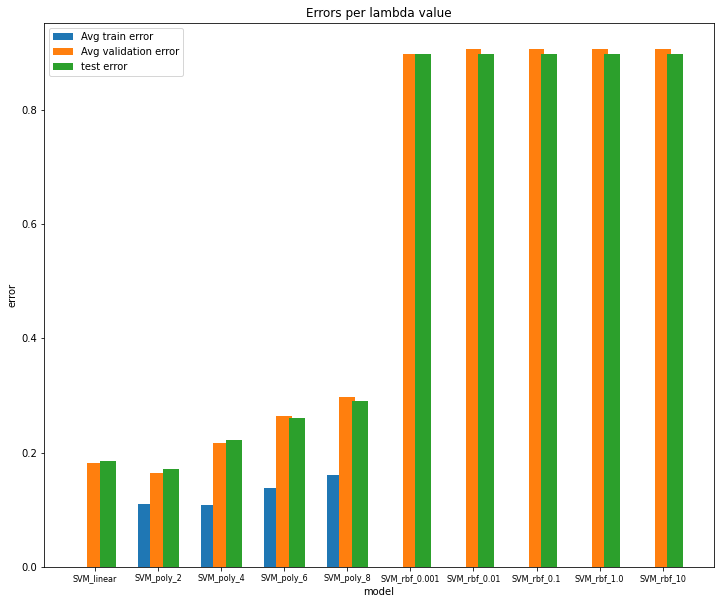

In [51]:
x_axis=np.linspace(1,10,10)
plt.figure(figsize=(12,10))

plt.bar(x_axis - 0.2, avg_train_error,0.25, align='center', label='Avg train error')
plt.bar(x_axis, avg_val_error,0.25, align='center', label='Avg validation error')
plt.bar(x_axis + 0.2, test_error,0.25, align='center', label='test error')
plt.xlabel('model')
plt.ylabel('error')
plt.xticks(x_axis,list(error_dict.keys()), fontsize =8)
plt.title("Errors per lambda value")
plt.legend()
plt.show()

<div dir="rtl">
לפי שיטת CV קיבלנו כי SVD עם גרעין פולינומיאלי  ממדרגה  2 מביא את השגיאה הכי נמוכה על  סט הולידציה

גם לפי  סט המבחן קיבלנו כי SVD עם גרעין פוליונמיאלי מדרגה 2 מביא לשגיאה הכי הנמוכה על סט האמון.
</div>